# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [112]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [113]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [114]:
df = pd.read_csv('./power_demand_vs_temperature.csv')
df.index = df["date"]
df = df.drop("date", axis=1)
df.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [115]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [116]:
print("The dataframe has " + str(df.isnull().sum().sum()) + " invalid rows")

The dataframe has 0 invalid rows


### Create X and y 

In [117]:
X = df.drop("demand", axis=1)
Y = df["demand"]
print("X has shape" + str(X.shape))
print("Y has shape" + str(Y.shape))

X has shape(1096, 1)
Y has shape(1096,)


### Plot the distribution



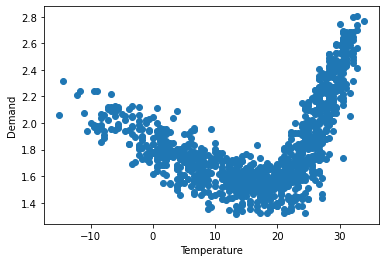

In [118]:
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.plot(X, Y, 'o')

### Divide the dataset in train and test splits

In [119]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=random_state)
print(f"Training set and test set have {Xtrain.shape[0]} and {Xtest.shape[0]} elements respectively")

Training set and test set have 822 and 274 elements respectively


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [120]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm

# n is number of observations
# p is number of regression parameters
def SSM(y_true, y_pred):
    to_ret = 0
    y_mean = np.mean(y_true)
    for i in range(len(y_true)):
        to_ret+=(y_mean - y_pred[i])**2
    return to_ret
def SST(y_true, y_pred):
    to_ret = 0
    y_mean = np.mean(y_true)
    for i in range(len(y_true)):
        to_ret+=(y_pred[i] - y_mean)**2
    return to_ret

def SSE(y_true, y_pred):
    to_ret = 0
    for i in range(len(y_true)):
        to_ret+=(y_true[i] - y_pred[i])**2
    return to_ret

def DFM(p):
    return p-1

def DFE(n, p):
    return n-p

def DFT(n):
    return n-1

def MSM(SSM, DFM):
    return SSM / DFM

def MSE(SSE, DFE):
    return SSE / DFE

def MST (SST, DFT):
    return SST / DFT

f_table = [{"Confidence Interval": [0, 0.900], "F-value": 1.89},
           {"Confidence Interval": [0, 0.950], "F-value": 2.28},
           {"Confidence Interval": [0, 0.975], "F-value": 2.68},
           {"Confidence Interval": [0, 0.990], "F-value": 2.22},
           {"Confidence Interval": [0, 0.999], "F-value": 4.71}]

levels = [0.100, 0.050, 0.025, 0.010, 0.001]

def my_evaluate(n, p, y_pred, y_true):
    F = MSM(SSM(y_true, y_pred), DFM(p)) / MSE(SSE(y_true, y_pred), DFE(n, p))
    level = DFE(n,p)/DFM(p)
    distances = [abs(level - l) for l in levels]
    f_table_i = np.argmin(distances)
    my_values = f_table[f_table_i]
    # interval = my_values["F-value"]
    r2 = SSM(y_true, y_pred) / SST(y_true, y_pred)
    print("Mean squared error: \t" + str(MSE(SSE(y_true, y_pred), DFE(n, p))))
    print("r2 score: \t\t" + str(r2_score(y_true, y_pred)))
    print("f-statistic: \t\t" + str(F))
    return MSE(SSE(y_true, y_pred), DFE(n, p)), r2_score(y_true, y_pred), F

## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [121]:
model = LinearRegression()
model.fit(Xtrain, Ytrain)
y_pred = model.predict(Xtest)
vals00, vals01, vals02 = my_evaluate(Xtest.shape[0], Xtest.shape[1]+1, y_pred, Ytest)

Mean squared error: 	0.10047643370714782
r2 score: 		0.16497160632995378
f-statistic: 		42.936354203555396


#### Visualize the prediction of the model 

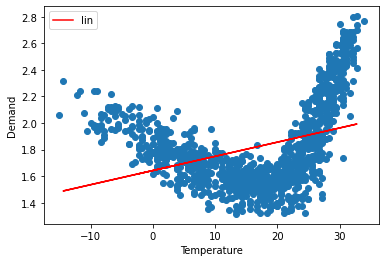

In [122]:
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.plot(X, Y, 'o')
plt.plot(Xtest, y_pred, label="lin", color="red")
plt.legend(loc="upper left")

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [123]:
features = PolynomialFeatures(degree = 2, include_bias = False)

In [124]:
model_2 = LinearRegression()
pipeline = Pipeline(steps=[('t', features), ('m', model_2)])
pipeline.fit(Xtrain, Ytrain)
y_pred_2 = pipeline.predict(Xtest)
vals10, vals11, vals12 = my_evaluate(Xtrain.shape[0], Xtrain.shape[1] + 1, y_pred_2, Ytest)

Mean squared error: 	0.0105525523550657
r2 score: 		0.7356133663568162
f-statistic: 		2187.822635223873


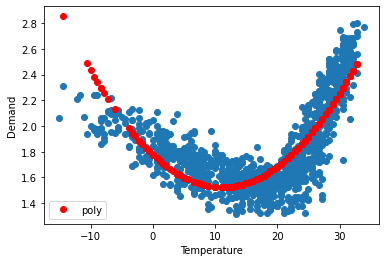

In [125]:
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.plot(X, Y, 'o')
plt.plot(Xtest, y_pred_2, 'o', label="poly", color="red")
plt.legend(loc="lower left")

## Third experiment

#### Polynomial degree = 3

In [126]:
features = PolynomialFeatures(degree = 3, include_bias = False)

In [127]:
model_3 = LinearRegression()
pipeline = Pipeline(steps=[('t', features), ('m', model_3)])
pipeline.fit(Xtrain, Ytrain)
y_pred_3 = pipeline.predict(Xtest)
vals20, vals21, vals22 = my_evaluate(Xtrain.shape[0], Xtrain.shape[1] + 1, y_pred_3, Ytest)

Mean squared error: 	0.006682531835192724
r2 score: 		0.83257395588548
f-statistic: 		4255.404031253318


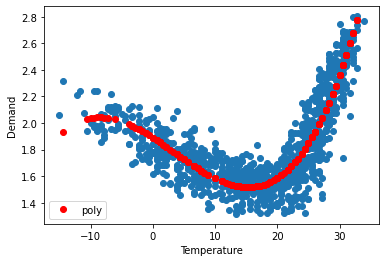

In [128]:
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.plot(X, Y, 'o')
plt.plot(Xtest, y_pred_3, 'o', label="poly", color="red")
plt.legend(loc="lower left")

## Fourth experiment
### Polynomial degree = 4

In [129]:
features = PolynomialFeatures(degree = 4, include_bias = False)

In [130]:
model_4 = LinearRegression()
pipeline = Pipeline(steps=[('t', features), ('m', model_4)])
pipeline.fit(Xtrain, Ytrain)
y_pred_4 = pipeline.predict(Xtest)
vals30, vals31, vals32 = my_evaluate(Xtrain.shape[0], Xtrain.shape[1] + 1, y_pred_4, Ytest)

Mean squared error: 	0.006581262402840308
r2 score: 		0.8351111889083287
f-statistic: 		4423.244586521021


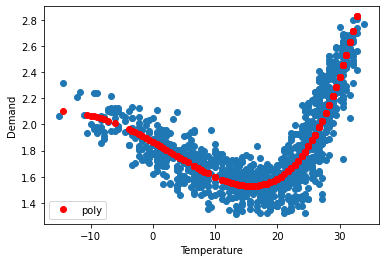

In [134]:
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.plot(X, Y, 'o')
plt.plot(Xtest, y_pred_4, 'o', label="poly", color="red")
plt.legend(loc="lower left")

## Compare the performance of the four models

In [155]:
vals_0 = np.array([[vals00, vals01, vals02]]).T
vals_1 = np.array([[vals10, vals11, vals12]]).T
vals_2 = np.array([[vals20, vals21, vals22]]).T
vals_3 = np.array([[vals30, vals31, vals32]]).T

compars = pd.DataFrame(np.concatenate((vals_0, vals_1, vals_2, vals_3), axis=1))
compars.columns = ["linear", "polynomial d = 2", "polynomial d = 3", "polynomial d = 4"]
compars.index = ["rmse", "r2", "f-statistic"]
compars.head()

,linear,polynomial d = 2,polynomial d = 3,polynomial d = 4
rmse,0.100476,0.010553,0.006683,0.006581
r2,0.164972,0.735613,0.832574,0.835111
f-statistic,42.936354,2187.822635,4255.404031,4423.244587
